In [1]:
%load_ext autoreload
%autoreload 2
import splitwavepy as sw
import numpy as np
import matplotlib.pyplot as plt

In [57]:
a = sw.Data(split=(30, 1.2), noise=0.05)

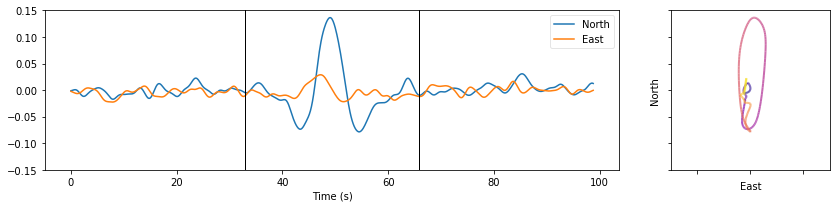

In [58]:
a.plot()

In [59]:
%timeit a.Meas().silver_chan()

100 loops, best of 3: 15.6 ms per loop


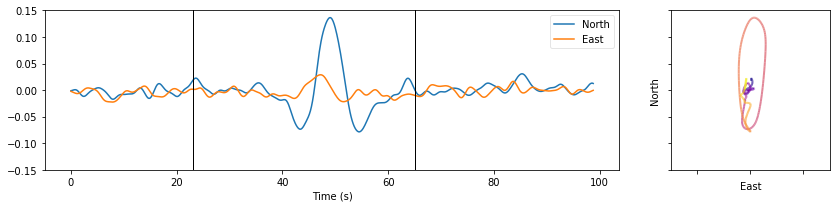

In [60]:
a.set_window(23, 65)
a.plot()

In [141]:
def set_window(data, w0, w1):
    data.set_window(w0, w1)
    return data

def scan_windows(data, w0min, w0max, w1min, w1max, nw0=10, nw1=10):
    assert w0min < w0max < w1min < w1max
    w0s = np.linspace(w0min, w0max, nw0)
    w1s = np.linspace(w1min, w1max, nw1)
    winlist = [ (w0, w1) for w0 in w0s for w1 in w1s ]
    return [ set_window(data,*win).Meas().silver_chan() for win in winlist ]
#     return [ data.set_window(w0, w1).Meas().silver_chan() for w0 in w0s for w1 in w1s ]

def cluster(data, w0min, w0max, w1min, w1max,**kwargs):
    
    scan = scan_windows()
    
    

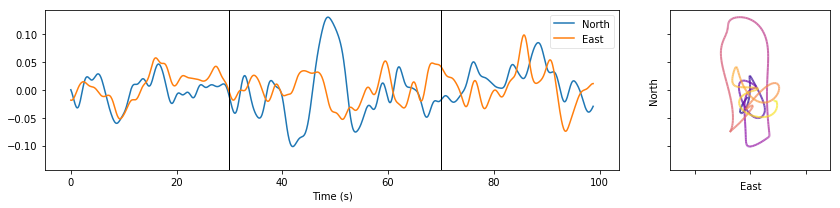

In [170]:
a = sw.Data(split=(30, 1.2), noise=0.15)
results = scan_windows(a, 20, 30, 60, 70)
a.plot()
# plt.scatter(re)

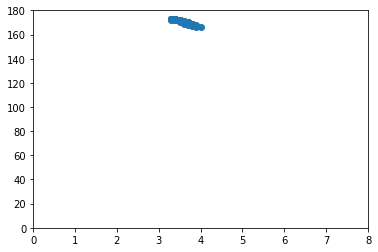

In [171]:
resarray = np.asarray(results)
plt.scatter(resarray[:,2], resarray[:,0])
plt.xlim(0,8)
plt.ylim(0,180)
plt.show()

In [148]:
results

[(133.0, 90.0, 5.7, 50.5),
 (132.0, 90.0, 5.7, 52.0),
 (116.0, 90.0, 10.600000000000001, 53.5),
 (114.0, 64.5, 10.9, 51.5),
 (114.0, 26.5, 11.100000000000001, 29.5),
 (115.0, 20.0, 11.4, 3.5),
 (116.0, 20.5, 11.600000000000001, 4.0),
 (117.0, 20.5, 12.0, 5.0),
 (118.0, 20.5, 12.200000000000001, 5.5),
 (119.0, 21.0, 12.4, 7.0),
 (133.0, 90.0, 5.7, 49.0),
 (132.0, 90.0, 5.7, 50.5),
 (132.0, 90.0, 5.7, 52.0),
 (114.0, 90.0, 10.600000000000001, 53.5),
 (112.0, 70.0, 10.9, 53.0),
 (113.0, 30.5, 11.100000000000001, 30.5),
 (115.0, 21.0, 11.4, 4.0),
 (116.0, 21.5, 11.600000000000001, 4.5),
 (117.0, 21.5, 12.0, 5.0),
 (119.0, 21.5, 12.200000000000001, 5.0),
 (132.0, 90.0, 5.7, 47.5),
 (131.0, 90.0, 5.6000000000000005, 49.0),
 (131.0, 90.0, 5.6000000000000005, 50.5),
 (132.0, 90.0, 5.7, 52.0),
 (133.0, 90.0, 5.7, 53.5),
 (113.0, 90.0, 10.9, 55.0),
 (113.0, 32.0, 11.100000000000001, 32.0),
 (115.0, 21.5, 11.4, 29.0),
 (116.0, 21.5, 11.600000000000001, 4.5),
 (119.0, 21.0, 12.0, 4.5),
 (129.0, 90

In [139]:
def scan_windows_surfaces(data, w0min, w0max, w1min, w1max, nw0=10, nw1=10):
    assert w0min < w0max < w1min < w1max
    w0s = np.linspace(w0min, w0max, nw0)
    w1s = np.linspace(w1min, w1max, nw1)
    winlist = [ (w0, w1) for w0 in w0s for w1 in w1s ]
    Ms = [ set_window(data,*win).Meas() for win in winlist ]
    return Ms
    
#     return [ data.set_window(w0, w1).Meas().silver_chan() for w0 in w0s for w1 in w1s ]

In [140]:
ms = scan_windows_surfaces(a, 20, 30, 60, 70)

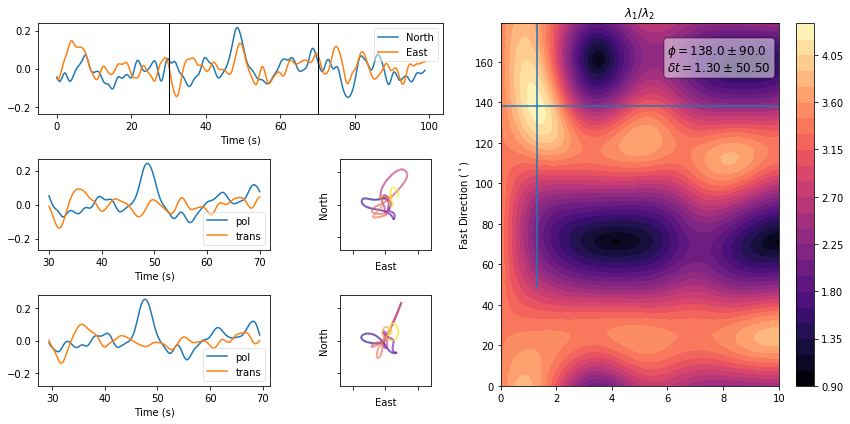

In [169]:
a.Meas().plot()

In [133]:
def stack(ms):
    nlags = min([ m._lags.size for m in ms ])
    return np.stack([m.lamrat[:nlags,:] for m in ms])


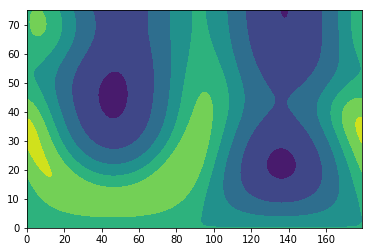

In [134]:
plt.contourf(np.sum(stack(ms), axis=0))
plt.show()

In [135]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler


# #############################################################################
# Generate sample data
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)

X = StandardScaler().fit_transform(X)

# #############################################################################
# Compute DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels,
                                           average_method='arithmetic'))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 3
Estimated number of noise points: 18
Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


In [172]:
X = np.asarray(results)[:,[0,3]]
X_scaled = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.3, min_samples=10).fit(X_scaled)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_


In [173]:
labels.shape

(100,)

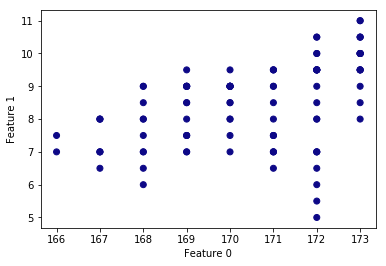

In [174]:
clusters = db.fit_predict(X_scaled)
# plot the cluster assignments
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap="plasma")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

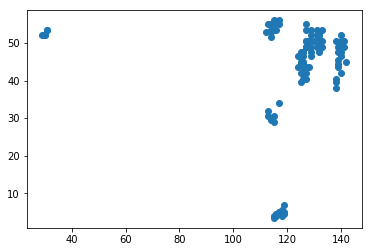

In [168]:
plt.scatter(np.asarray(results)[:,[0]], np.asarray(results)[:,[3]])
plt.show()

In [167]:
results

[(133.0, 90.0, 5.7, 50.5),
 (132.0, 90.0, 5.7, 52.0),
 (116.0, 90.0, 10.600000000000001, 53.5),
 (114.0, 64.5, 10.9, 51.5),
 (114.0, 26.5, 11.100000000000001, 29.5),
 (115.0, 20.0, 11.4, 3.5),
 (116.0, 20.5, 11.600000000000001, 4.0),
 (117.0, 20.5, 12.0, 5.0),
 (118.0, 20.5, 12.200000000000001, 5.5),
 (119.0, 21.0, 12.4, 7.0),
 (133.0, 90.0, 5.7, 49.0),
 (132.0, 90.0, 5.7, 50.5),
 (132.0, 90.0, 5.7, 52.0),
 (114.0, 90.0, 10.600000000000001, 53.5),
 (112.0, 70.0, 10.9, 53.0),
 (113.0, 30.5, 11.100000000000001, 30.5),
 (115.0, 21.0, 11.4, 4.0),
 (116.0, 21.5, 11.600000000000001, 4.5),
 (117.0, 21.5, 12.0, 5.0),
 (119.0, 21.5, 12.200000000000001, 5.0),
 (132.0, 90.0, 5.7, 47.5),
 (131.0, 90.0, 5.6000000000000005, 49.0),
 (131.0, 90.0, 5.6000000000000005, 50.5),
 (132.0, 90.0, 5.7, 52.0),
 (133.0, 90.0, 5.7, 53.5),
 (113.0, 90.0, 10.9, 55.0),
 (113.0, 32.0, 11.100000000000001, 32.0),
 (115.0, 21.5, 11.4, 29.0),
 (116.0, 21.5, 11.600000000000001, 4.5),
 (119.0, 21.0, 12.0, 4.5),
 (129.0, 90